# 3 Робота з даними

## 3.1 Перевірка даних

### Імпортуємо пакет pandas, завантажимо дані про якість води в датафрейм, виводимо інформацію про нього

In [1]:
import pandas as pd
df = pd.read_csv('data/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


*Завантажений датафрейм*

### Перевіримо датафрейм на наявність пустих значень, покажемо статистику на графіку. Для цього імпортуємо модуль missingo. 

<AxesSubplot: >

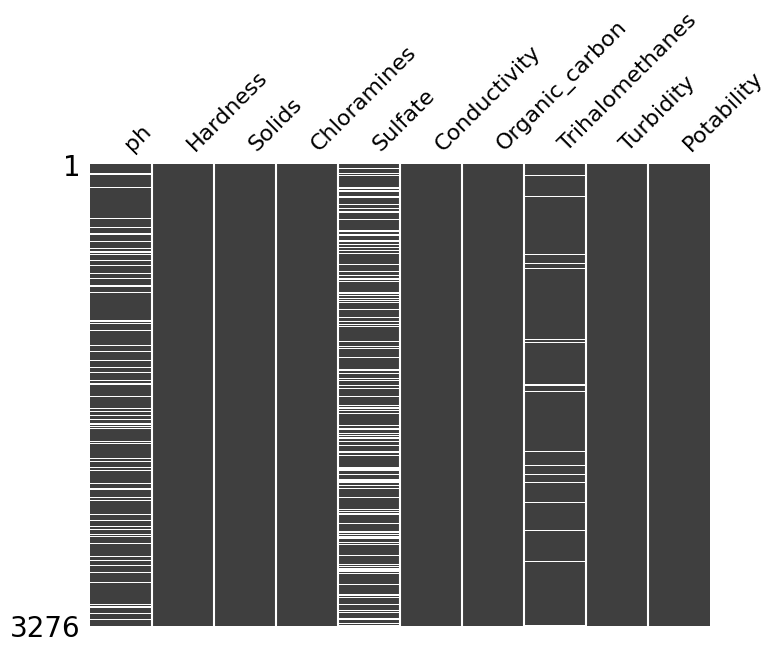

In [5]:
import matplotlib.pyplot as plt
import missingno as msno
fig, axis = plt.subplots(1, 1, figsize=(8, 6))
msno.matrix(df, ax=axis)

*Графік кількості пустих значень у стовпичах*

### Додатково покажемо кількість пустих значень за допомогою гістограми імпортувавши модуль matplotlib.pyplot. За допомогою методів pandas.Dataframe.isnull, pandas.Series.sum, pandas.Series.count покажемо статистику пропущених клітинок. 

<BarContainer object of 10 artists>

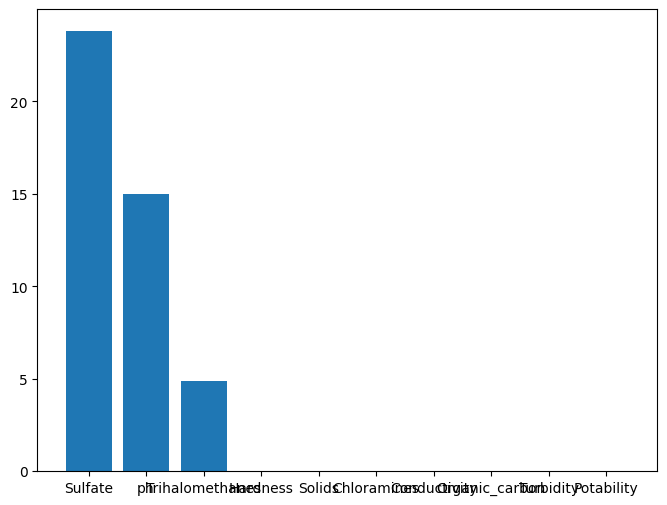

In [7]:
import matplotlib.pyplot
percent_1 = df.isnull().sum() / df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([percent_2], axis=1, keys=['%'])
fig, axis = plt.subplots(1, 1, figsize=(8, 6))
axis.bar(missing_data.index, missing_data.iloc[:, 0])

*Графік кількості пустих значень у стовпичах у вигляді гістограми*

### Замінимо пусті значеннями середніми для кожної колонки. Для цього викличемо методи pandas.Dataframe.fillna, у який передамо параметр inplace=True для того, щоб змінити значення в самому датафреймі, а не в його копії. Також застосуємо метод pandas.Series.mean для знаходження середнього. Після проведених дій дізнаємося, чи взагалі залишилися колонки з неініціалізованими значеннями. Щоб це зробити застосуємо методи pandas.Dataframe.isna та pandas.Dataframe.any.

In [9]:
for col in df.columns:
    df[col].fillna(value=df[col].mean(), inplace=True)
df.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

*Колонки, де всі значення ініціалізовані*